In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission_V9Inaty.csv")

In [3]:
train_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [4]:
train_data.shape,test_data.shape

((52670, 12), (210289, 11))

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52670 entries, 0 to 52669
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     52670 non-null  int64  
 1   Product_ID                  52670 non-null  object 
 2   Gender                      52669 non-null  object 
 3   Age                         52669 non-null  object 
 4   Occupation                  52669 non-null  float64
 5   City_Category               52669 non-null  object 
 6   Stay_In_Current_City_Years  52669 non-null  object 
 7   Marital_Status              52669 non-null  float64
 8   Product_Category_1          52669 non-null  float64
 9   Product_Category_2          36121 non-null  float64
 10  Product_Category_3          16018 non-null  float64
 11  Purchase                    52669 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 4.8+ MB


In [6]:
train_data[train_data["Gender"].isna()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
52669,1002018,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_data = train_data.dropna(axis=0, subset=['Gender'])

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52669 entries, 0 to 52668
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     52669 non-null  int64  
 1   Product_ID                  52669 non-null  object 
 2   Gender                      52669 non-null  object 
 3   Age                         52669 non-null  object 
 4   Occupation                  52669 non-null  float64
 5   City_Category               52669 non-null  object 
 6   Stay_In_Current_City_Years  52669 non-null  object 
 7   Marital_Status              52669 non-null  float64
 8   Product_Category_1          52669 non-null  float64
 9   Product_Category_2          36121 non-null  float64
 10  Product_Category_3          16018 non-null  float64
 11  Purchase                    52669 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 5.2+ MB


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210289 entries, 0 to 210288
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     210289 non-null  int64  
 1   Product_ID                  210289 non-null  object 
 2   Gender                      210289 non-null  object 
 3   Age                         210289 non-null  object 
 4   Occupation                  210289 non-null  int64  
 5   City_Category               210289 non-null  object 
 6   Stay_In_Current_City_Years  210289 non-null  object 
 7   Marital_Status              210289 non-null  int64  
 8   Product_Category_1          210289 non-null  int64  
 9   Product_Category_2          145136 non-null  float64
 10  Product_Category_3          63883 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 17.6+ MB


In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,52669.0,1.002517e+06,1749.021759,1000001.0,1001063.0,1001974.0,1003998.0,1006040.0
Occupation,52669.0,8.126374e+00,6.586285,0.0,2.0,7.0,14.0,20.0
Marital_Status,52669.0,4.085135e-01,0.491564,0.0,0.0,0.0,1.0,1.0
Product_Category_1,52669.0,5.306423e+00,3.719144,1.0,1.0,5.0,8.0,18.0
Product_Category_2,36121.0,9.864096e+00,5.067747,2.0,5.0,9.0,15.0,18.0
Product_Category_3,16018.0,1.271201e+01,4.118026,3.0,9.0,14.0,16.0,18.0
Purchase,52669.0,9.275554e+03,4949.778493,185.0,5854.0,8044.0,12029.0,23958.0


In [11]:
train_data.duplicated().sum()

0

In [12]:
test_data.duplicated().sum()

0

In [13]:
train_data.Age.value_counts()

26-35    20722
36-45    10451
18-25    10172
46-50     4165
51-55     3698
55+       1978
0-17      1483
Name: Age, dtype: int64

<AxesSubplot:>

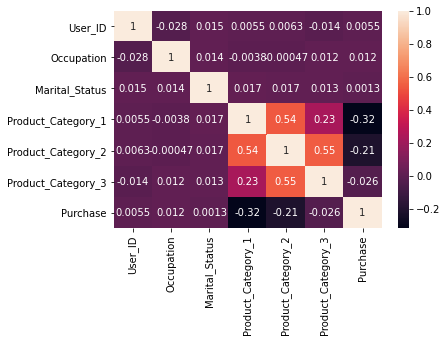

In [14]:
sns.heatmap(train_data.corr(),annot=True)

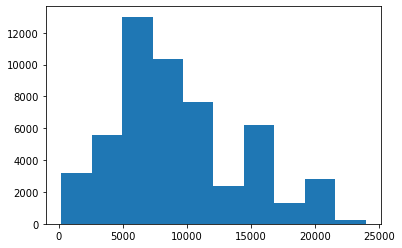

In [15]:

plt.hist(train_data['Purchase'])
plt.show()

In [16]:
train_data["data"]="train"
test_data["data"]="test"

In [17]:
all_data=pd.concat([train_data,test_data])
all_data = all_data.reset_index().drop(columns="index")
all_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
262953,1000294,P00303042,F,46-50,9.0,C,3,1.0,5.0,NaN,NaN,NaN,test
262954,1000294,P0099042,F,46-50,9.0,C,3,1.0,5.0,12.0,14.0,NaN,test
262955,1000295,P00147942,M,18-25,0.0,C,4+,0.0,1.0,16.0,NaN,NaN,test
262956,1000296,P00070342,M,51-55,5.0,C,4+,1.0,1.0,2.0,14.0,NaN,test


In [18]:
columns =all_data.columns

In [19]:
all_data[columns].apply(lambda x: print(x.value_counts()))

1001680    534
1001941    487
1000889    479
1001181    470
1004277    453
          ... 
1004775      2
1005309      2
1004332      2
1005207      2
1005796      1
Name: User_ID, Length: 5891, dtype: int64
P00265242    920
P00112142    815
P00025442    796
P00110742    742
P00184942    706
            ... 
P00262642      1
P00056942      1
P00206242      1
P00306342      1
P0093842       1
Name: Product_ID, Length: 3504, dtype: int64
M    198021
F     64937
Name: Gender, dtype: int64
26-35    104813
36-45     52478
18-25     48263
46-50     21778
51-55     18344
55+       10149
0-17       7133
Name: Age, dtype: int64
4.0     34666
0.0     33047
7.0     27972
1.0     22682
17.0    19453
20.0    16291
12.0    14797
14.0    12838
2.0     12833
16.0    12080
6.0      9700
3.0      8623
10.0     6192
15.0     5804
11.0     5675
5.0      5674
19.0     4003
13.0     3776
18.0     3110
9.0      2994
8.0       748
Name: Occupation, dtype: int64
B    110841
C     81312
A     70805
Name: City_Ca

User_ID                       None
Product_ID                    None
Gender                        None
Age                           None
Occupation                    None
City_Category                 None
Stay_In_Current_City_Years    None
Marital_Status                None
Product_Category_1            None
Product_Category_2            None
Product_Category_3            None
Purchase                      None
data                          None
dtype: object

In [20]:
all_data[columns].apply(lambda x: x.nunique())

User_ID                        5891
Product_ID                     3504
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      11931
data                              2
dtype: int64

In [21]:

all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,262958.0,1.002925e+06,1743.933550,1000001.0,1001385.0,1002909.0,1004404.0,1006040.0
Occupation,262958.0,8.091832e+00,6.532380,0.0,2.0,7.0,14.0,20.0
Marital_Status,262958.0,4.096814e-01,0.491776,0.0,0.0,0.0,1.0,1.0
Product_Category_1,262958.0,5.287301e+00,3.733567,1.0,1.0,5.0,8.0,18.0
Product_Category_2,181257.0,9.854643e+00,5.089337,2.0,5.0,9.0,15.0,18.0
Product_Category_3,79901.0,1.268128e+01,4.120396,3.0,9.0,14.0,16.0,18.0
Purchase,52669.0,9.275554e+03,4949.778493,185.0,5854.0,8044.0,12029.0,23958.0


<AxesSubplot:>

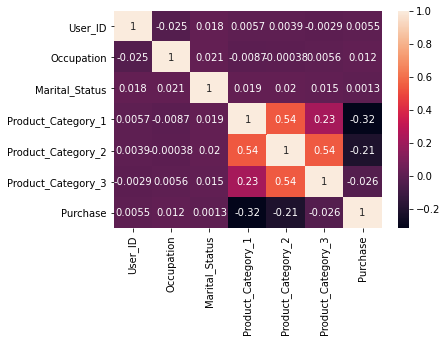

In [22]:
sns.heatmap(all_data.corr(),annot=True)

In [23]:
all_data["Product_Category_2"] = all_data.Product_Category_2.transform(lambda x: x.fillna(-1))
all_data["Product_Category_3"] = all_data.Product_Category_3.transform(lambda x: x.fillna(-1))

In [24]:
 all_data.loc[all_data['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = 4
all_data[all_data['Stay_In_Current_City_Years']=='4+']
all_data['Stay_In_Current_City_Years'] = all_data['Stay_In_Current_City_Years'].astype(float)

In [25]:
all_data["Occupation"]=all_data.Occupation.astype(str)
all_data["Marital_Status"]=all_data.Marital_Status.astype(str)

In [26]:
Product_ID_cnt=all_data["Product_ID"].value_counts()

In [27]:

all_data["Product_ID"]= all_data["Product_ID"].apply(lambda x : x.strip())

In [28]:
all_data["Product_ID"].value_counts()

P00265242    920
P00112142    815
P00025442    796
P00110742    742
P00184942    706
            ... 
P00262642      1
P00056942      1
P00206242      1
P00306342      1
P0093842       1
Name: Product_ID, Length: 3504, dtype: int64

In [29]:
Product_ID_cnt_less_than_100=  Product_ID_cnt[Product_ID_cnt<=100]
Product_ID_cnt_less_than_100

P00302742    100
P00010342    100
P00337642    100
P00155242    100
P00294142    100
            ... 
P00262642      1
P00056942      1
P00206242      1
P00306342      1
P0093842       1
Name: Product_ID, Length: 2666, dtype: int64

In [30]:
all_data["Product_ID_encoded"]=all_data["Product_ID"].apply(lambda x : 'other' if x in Product_ID_cnt_less_than_100 else x )

In [31]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262958 entries, 0 to 262957
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     262958 non-null  int64  
 1   Product_ID                  262958 non-null  object 
 2   Gender                      262958 non-null  object 
 3   Age                         262958 non-null  object 
 4   Occupation                  262958 non-null  object 
 5   City_Category               262958 non-null  object 
 6   Stay_In_Current_City_Years  262958 non-null  float64
 7   Marital_Status              262958 non-null  object 
 8   Product_Category_1          262958 non-null  float64
 9   Product_Category_2          262958 non-null  float64
 10  Product_Category_3          262958 non-null  float64
 11  Purchase                    52669 non-null   float64
 12  data                        262958 non-null  object 
 13  Product_ID_enc

In [32]:
all_data = all_data.reset_index().drop(columns="index")

In [33]:
category_data_columns = all_data.select_dtypes(exclude = np.number).drop(columns=["data","Product_ID"]).columns

In [34]:
numeric_data_columns = all_data.select_dtypes(include = np.number).drop(columns = ["Purchase","User_ID"]).columns

In [35]:
preprocess_category_data_columns = pd.get_dummies(all_data[category_data_columns])
scaler = StandardScaler()

In [36]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(all_data[numeric_data_columns]), columns=numeric_data_columns)

In [37]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, all_data[["data","Purchase","User_ID","Product_ID"]]], axis = 1)

In [38]:
final_preprocessed.shape

(262958, 882)

In [39]:
train_preprocessed = final_preprocessed[final_preprocessed["data"]=="train"]

In [40]:
test_preprocessed = final_preprocessed[final_preprocessed["data"]=="test"]

In [41]:
test_preprocessed = test_preprocessed.drop(columns = ["data","Purchase"])

In [42]:
#train_preprocessed.to_csv("train_preprocessed.csv")
#test_preprocessed.to_csv("test_preprocessed.csv")

In [43]:
train_preprocessed.to_csv("train_preprocessed_1.csv")

test_preprocessed.to_csv("test_preprocessed_1.csv")